# **Proyek Analisis Data : Bike Sharing Dataset**

**Nama :** Given Putra<br/>
**Email :** mc325d5y0398@student.devacademy.id<br/>
**ID Dicoding :** MC325D5Y0398<br/>

## **Latar Belakang Dataset**

**Bike Sharing Systems** merupakan generasi baru dari penyewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembalian telah menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari lokasi tertentu dan kembali lagi di lokasi lain. Saat ini, terdapat sekitar lebih dari 500 program ini di seluruh dunia yang terdiri dari lebih dari 500 ribu sepeda. Saat ini, terdapat minat yang besar terhadap sistem ini karena perannya yang penting dalam masalah lalu lintas, lingkungan, dan kesehatan.<br/><br/>

Selain aplikasi bike sharing systems di dunia nyata yang menarik, karakteristik data yang dihasilkan oleh sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah bike sharing systems menjadi jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas di kota. Oleh karena itu, diharapkan sebagian besar peristiwa penting di kota dapat dideteksi melalui pemantauan data ini.<br/><br/>

Dataset ini berisi jumlah sepeda sewaan per jam dan per hari antara tahun 2011 dan 2012 di bike sharing systems dengan informasi cuaca dan musim yang sesuai. Proses penyewaan sepeda bersama sangat berkorelasi dengan lingkungan dan pengaturan musiman. Misalnya, kondisi cuaca, curah hujan, hari dalam seminggu, musim, jam dalam sehari, dapat memengaruhi perilaku penyewaan. Kumpulan data inti berkaitan dengan catatan historis yang sesuai dengan tahun 2011 dan 2012 dari sistem Capital Bikeshare, Washington D.C., Amerika Serikat yang tersedia untuk umum di http://capitalbikeshare.com/system-data. Kami menggabungkan data berdasarkan dua jam dan harian, lalu mengekstrak dan menambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diekstrak dari http://www.freemeteo.com.

## **Menentukan Pertanyaan Bisnis**

**Pertanyaan 1 :**
- Bagaimana pola penggunaan sepeda oleh pengguna berulang (pengguna lama) dibandingkan dengan pengguna baru dalam rentang waktu mingguan, bulanan, dan musiman?

**Pertanyaan 2 :**
- Apakah tren jumlah penyewaan sepeda meningkat dari tahun 2011 ke 2012, dan faktor apa yang paling mempengaruhinya?

## **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## **Data Wrangling**

### **Gathering Data**

In [2]:
day = "/content/drive/MyDrive/Bike-sharing-dataset/day.csv"
day_df = pd.read_csv(day)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = "/content/drive/MyDrive/Bike-sharing-dataset/hour.csv"
hour_df = pd.read_csv(hour)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight :**<br/>
- Seperti yang telah disebutkan pada latar belakang, dataset ini terbagi menjadi dua, yaitu jumlah sewaan sepeda per hari dan per jam, yang keduanya memiliki rentang waktu yang sama, yaitu dari tahun 2011 ke 2012. Pada tahap gathering data ini karena data sudah dikumpulkan sebelumnya, jadi yang dilakukan adalah pembacaan dataset menggunakan library pandas dan fungsi head. Kesuksesan program dalam membaca data dapat dilihat dari program yang berjalan dan berhasil menampilkan lima baris pertama dari dataset day.csv dan juga hour.csv berikut.

### **Assessing Data**

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi tabel day : ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi tabel day :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi tabel hour : ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi tabel hour :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [8]:
hour_windspeed = (hour_df["windspeed"] == 0.0).sum()
print("Jumlah nilai 0 pada kolom windspeed : ", hour_windspeed)

Jumlah nilai 0 pada kolom windspeed :  2180


**Insight :**<br/>
- Pada tahapan assessing data, pertama yang dilakukan adalah melihat kedua info dataset tersebut. Dari hasil info, dapat disimpulkan bahwa kedua dataset tidak memiliki missing value sama sekali.
- Tetapi, terdapat tipe data yang salah, yaitu pada bagian dteday pada kedua dataset tersebut, yang seharusnya merupakan tipe data datetime dan bukan object, karena data yang disimpan adalah tanggal dan bukan string.
- Setelah itu, dilakukan pengecekan data duplikat terhadap kedua dataset, dan hasilnya pada kedua dataset tidak terdapat data duplikat sama sekali.
- Terakhir, untuk mengecek apakah ada inacurrate value, maka menggunakan fungsi describe(), dan ternyata pada dataset hour.csv, spesifiknya di bagian windspeed terdapat kejanggalan karena sebanyak 2180 kolom bernilai 0, ini seharusnya tidak memungkinkan karena tidak mungkin tidak ada angin sama sekali, apalagi sebanyak 2180 kasus.

### **Cleaning Data**

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])
  hour_df[column] = pd.to_datetime(hour_df[column])

In [10]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
windspeed_median = hour_df.groupby("weathersit")["windspeed"].transform("median")

hour_df["windspeed"] = hour_df["windspeed"].mask(hour_df["windspeed"] == 0.0, windspeed_median)

In [13]:
hour_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.213455,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.089600,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.134300,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.099557,49.305030,151.357286,181.387599


**Insight :**<br/>
- Setelah mengetahui apa saja kejanggalan yang perlu diperbaiki dalam dataset, sekarang saatnya untuk melakukan data cleaning. Pertama, dengan mengubah tipe data pada kolom dteday yang tadinya object, menjadi datetime.
- Lalu, semua nilai windspeed yang 0 di dataset hour.csv akan diisi dengan median kecepatan angin berdasarkan kondisi cuaca (weathersit). Dengan ini, nilai windspeed yang 0 tidak sembarang diisi dengan median biasa, tetapi median yang bervariasi sesuai dengan kondisi cuaca. Maka dari itu, data yang diisi ke windspeed akan lebih akurat dan sesuai.

## **Exploratory Data Analysis (EDA)**

### **Eksplorasi data day_df**

In [14]:
day_df["year"] = day_df["dteday"].dt.year

user_usage_by_season = day_df.groupby("season")[["casual", "registered", "cnt"]].sum()

user_usage_by_season

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


**Insight :**<br/>
- Penggunaan sepeda tertinggi terjadi di musim gugur (fall), diikuti oleh musim panas.
- Penggunaan sepeda paling rendah terjadi di musim dingin, baik untuk pengguna casual maupun registered.
- Pengguna registered lebih stabil sepanjang musim, sementara pengguna casual cenderung mengalami fluktuasi lebih besar.

In [15]:
user_usage_by_week = day_df.groupby("weekday")[["casual", "registered", "cnt"]].mean().astype(int)

user_usage_by_week

,casual,registered,cnt
weekday,,,
0,1338,2890,4228
1,674,3663,4338
2,556,3954,4510
3,551,3997,4548
4,590,4076,4667
5,752,3938,4690
6,1465,3085,4550


**Insight :**<br/>
- Pengguna casual lebih banyak menyewa sepeda di akhir pekan (Sabtu & Minggu).
- Pengguna registered lebih banyak menyewa sepeda di hari kerja (Senin-Jumat).
- Total penyewaan paling rendah terjadi pada hari Senin.

In [16]:
user_usage_by_month = day_df.groupby("mnth")[["casual", "registered", "cnt"]].mean().astype(int)

user_usage_by_month

,casual,registered,cnt
mnth,,,
1,194,1982,2176
2,262,2392,2655
3,716,2975,3692
4,1013,3471,4484
5,1214,4135,5349
6,1231,4540,5772
7,1260,4303,5563
8,1161,4502,5664
9,1172,4594,5766


**Insight :**<br/>
- Jumlah penyewaan meningkat dari awal tahun, mencapai puncak di musim panas (Juni-September), lalu turun di musim dingin.
- Pengguna casual mengalami lonjakan terbesar selama bulan-bulan musim panas.
- Pengguna registered tetap cukup stabil sepanjang tahun, tetapi juga mengalami penurunan di musim dingin.

In [17]:
yearly_trend = day_df.groupby("year")["cnt"].sum()

yearly_trend

,cnt
year,
2011,1243103
2012,2049576


**Insight :**<br/>
- Jumlah total penyewaan sepeda meningkat signifikan dari 2011 ke 2012.
- Ini menunjukkan adanya pertumbuhan penggunaan layanan bike-sharing selama dua tahun tersebut.

In [18]:
monthly_trend = day_df.pivot_table(index=day_df["dteday"].dt.month, columns="year", values="cnt", aggfunc="mean").astype(int)

monthly_trend

year,2011,2012
dteday,,
1,1231,3120
2,1721,3556
3,2065,5318
4,3162,5807
5,4381,6318
6,4783,6761
7,4559,6567
8,4409,6919
9,4247,7285


**Insight :**<br/>
- Penyewaan sepeda menunjukkan pola musiman yang jelas.
- Jumlah penyewaan mencapai puncaknya pada musim panas (Juni-September) di kedua tahun.
- Musim dingin (Desember-Februari) menunjukkan penurunan signifikan dalam jumlah penyewaan.
- Pada setiap bulan di tahun 2012, jumlah penyewaan lebih tinggi dibandingkan 2011, menunjukkan pertumbuhan berkelanjutan.

In [19]:
factor_correlation = day_df.corr()["cnt"].sort_values(ascending=False)

factor_correlation

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.631066
instant,0.628830
dteday,0.628830
temp,0.627494
year,0.566710
yr,0.566710
season,0.406100


**Insight :**<br/>
- Suhu (temp) memiliki korelasi positif tertinggi terhadap jumlah penyewaan sepeda.
- Kelembaban (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif, menunjukkan bahwa kondisi cuaca buruk cenderung menurunkan jumlah penyewaan.
- Kondisi cuaca (weathersit) juga berpengaruh, di mana cuaca yang lebih cerah cenderung meningkatkan jumlah penyewaan.
- Hari kerja (workingday) memiliki korelasi yang lebih kecil, yang menunjukkan bahwa sepeda tidak hanya digunakan untuk transportasi kerja tetapi juga untuk rekreasi.

## **Visualization & Explanatory Analysis**

### **Pertanyaan 1 :**

<Figure size 1000x500 with 0 Axes>

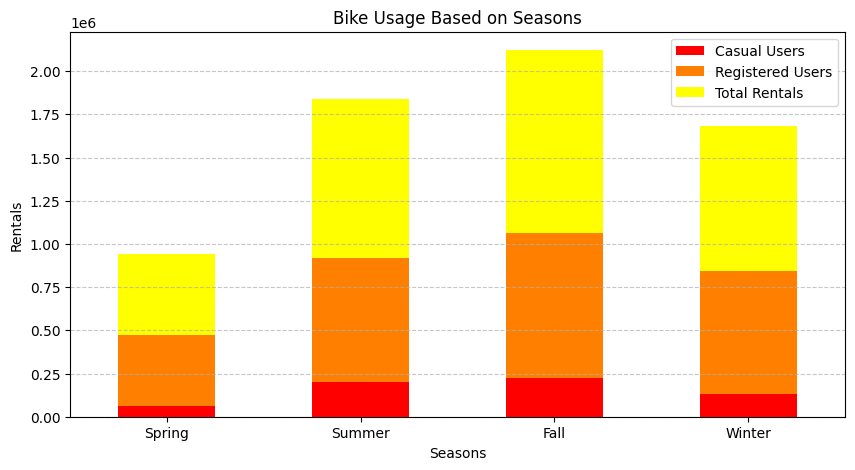

In [20]:
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
user_usage_by_season.index = user_usage_by_season.index.map(season_mapping)

plt.figure(figsize=(10, 5))
user_usage_by_season.plot(kind="bar", stacked=True, colormap="autumn", figsize=(10, 5))
plt.title("Bike Usage Based on Seasons")
plt.xlabel("Seasons")
plt.ylabel("Rentals")
plt.legend(["Casual Users", "Registered Users", "Total Rentals"])
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight :** Berikut merupakan bar chart untuk penggunaan sepeda berdasarkan musim.
- Berdasarkan visualisasi data, dapat dilihat bahwa musim gugur merupakan musim dengan penggunaan sepeda terbanyak, diikuti oleh musim panas, musim semi, dan terakhir, musim dingin.

<Figure size 1000x500 with 0 Axes>

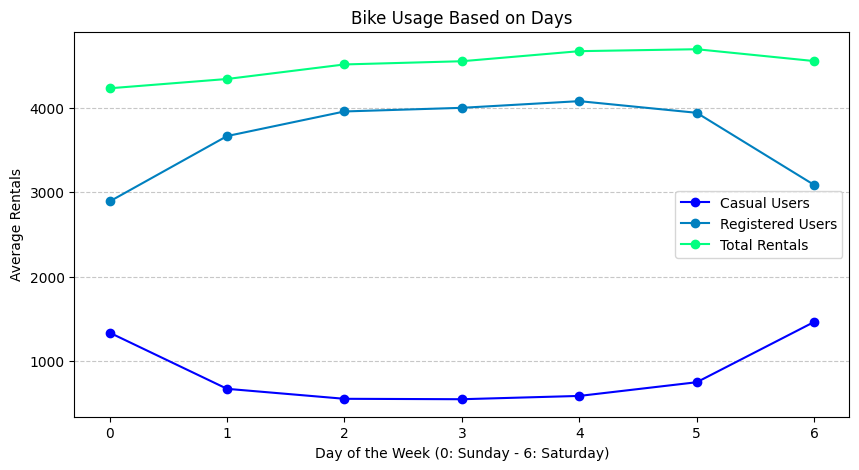

In [21]:
plt.figure(figsize=(10, 5))
user_usage_by_week.plot(kind="line", marker="o", colormap="winter", figsize=(10, 5))
plt.title("Bike Usage Based on Days")
plt.xlabel("Day of the Week (0: Sunday - 6: Saturday)")
plt.ylabel("Average Rentals")
plt.legend(["Casual Users", "Registered Users", "Total Rentals"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight :** Berikut merupakan line chart untuk penggunaan sepeda berdasarkan hari.
- Berdasarkan visualisasi data, dapat dilihat bahwa casual users paling sering menggunakan sepeda di hari Sabtu, dan paling jarang menggunakan sepeda di hari Selasa dan Rabu.
- Sedangkan registered users paling sering menggunakan sepeda di hari Kamis dan paling jarang menggunakan sepeda di hari Minggu.
- Sedangkan untuk keseluruhan pengguna, paling sering menggunakan sepeda di hari Jumat dan paling jarang di hari Minggu.

<Figure size 1000x500 with 0 Axes>

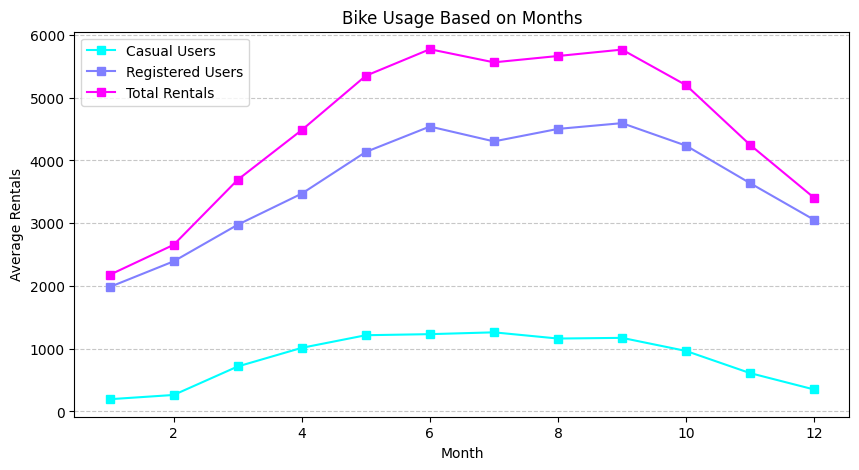

In [22]:
plt.figure(figsize=(10, 5))
user_usage_by_month.plot(kind="line", marker="s", colormap="cool", figsize=(10, 5))
plt.title("Bike Usage Based on Months")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.legend(["Casual Users", "Registered Users", "Total Rentals"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**Insight :** Berikut merupakan line chart untuk penggunaan sepeda berdasarkan bulan.
- Berdasarkan visualisasi data, dapat dilihat bahwa casual users paling sering menggunakan sepeda di bulan 7 (Juli), dan paling jarang menggunakan sepeda di bulan 1 (Januari).
- Sedangkan registered users paling sering menggunakan sepeda di bulan 6 (Juni) serta 9 (September) dan paling jarang menggunakan sepeda di bulan 1 (Januari).
- Sedangkan untuk keseluruhan pengguna, paling sering menggunakan sepeda di bulan 6 (Juni) serta 9 (September) dan paling jarang menggunakan sepeda di bulan 1 (Januari).

### **Pertanyaan 2 :**

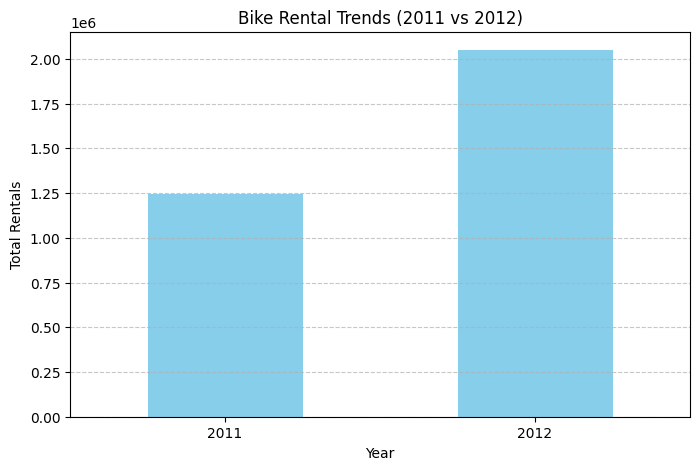

In [23]:
plt.figure(figsize=(8, 5))
yearly_trend.plot(kind='bar', color='skyblue')
plt.title('Bike Rental Trends (2011 vs 2012)')
plt.ylabel('Total Rentals')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight :** Berikut merupakan bar chart untuk tren penyewaan sepeda antara tahun 2011 dengan 2012.
- Dapat dilihat bahwa tahun 2012 mengalami penaikan untuk penyewaan sepeda dibandingkan tahun 2011.

<Figure size 1000x500 with 0 Axes>

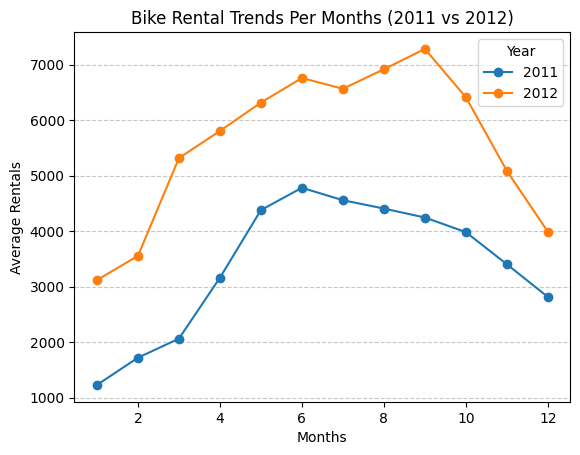

In [24]:
plt.figure(figsize=(10, 5))
monthly_trend.plot(kind='line', marker='o')
plt.title('Bike Rental Trends Per Months (2011 vs 2012)')
plt.ylabel('Average Rentals')
plt.xlabel('Months')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Year')
plt.show()

**Insight :** Berikut merupakan line chart untuk perbandingan penyewaan jasa per bulan antara tahun 2011 dengan 2012.
- Tahun 2012 memiliki lebih banyak peminat penyewaan sepeda dengan bulan terbanyak di bulan 9 (September).
- Sedangkan tahun 2011 memiliki peminat penyewaan sepeda dengan bulan terbanyak di bulan 6 (Juni). Keduanya sama-sama memiliki peminat paling sedikit di bulan 1 (Januari).

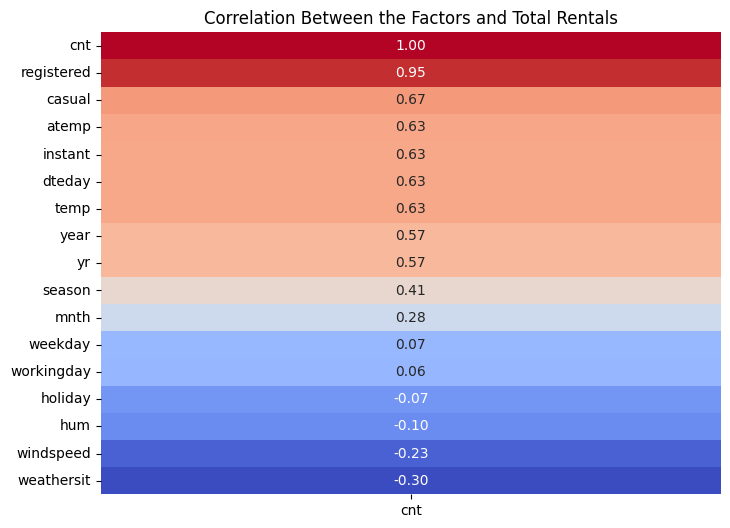

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(factor_correlation.to_frame(), annot=True, cmap="coolwarm", cbar=False, fmt=".2f")
plt.title('Correlation Between the Factors and Total Rentals')
plt.show()

**Insight :** Berikut merupakan heatmap yang menggambarkan hubungan antara faktor yang paling mempengaruhi banyaknya pengguna sepeda.
- Dapat dilihat di paling atas bahwa faktor yang paling mempengaruhi adalah temperatur yang dapat dilihat dari nilai korelasi yang positif dan faktor yang paling tidak mempengaruhi adalah cuaca, terlihat dari nilai korelasi yang negatif.

## **Analisis Lanjutan**

In [26]:
def classify_duration(cnt):
    if cnt < 30:
        return "Short Trip User"
    elif 30 <= cnt <= 60:
        return "Medium Trip User"
    else:
        return "Long Trip User"

hour_df["trip_duration_cluster"] = hour_df["cnt"].apply(classify_duration)

duration_clusters = hour_df["trip_duration_cluster"].value_counts()

duration_clusters

,count
trip_duration_cluster,
Long Trip User,12047
Short Trip User,3687
Medium Trip User,1645


Pengguna dikelompokkan (clustering) menjadi tiga kategori berdasarkan jumlah penyewaan per jam :
- Short Trip Users (<30 penyewaan per jam) : Pengguna yang menyewa sepeda dalam jumlah sedikit per jam, yang kemungkinan besar hanya melakukan perjalanan singkat.
- Medium Trip Users (30-60 penyewaan per jam) : Pengguna dengan jumlah penyewaan menengah, kemungkinan melakukan perjalanan sedang.
- Long Trip Users (>60 penyewaan per jam) : Pengguna yang menyewa sepeda dalam jumlah besar per jam, kemungkinan besar merupakan pengguna regular atau pengguna yang bersepeda dalam waktu lama.

**Insight :**
- Sebagian besar pengguna menyewa sepeda lebih dari 60 menit (Long Trip Users).
- Jumlahnya jauh lebih besar dibandingkan pengguna yang melakukan perjalanan pendek atau sedang.

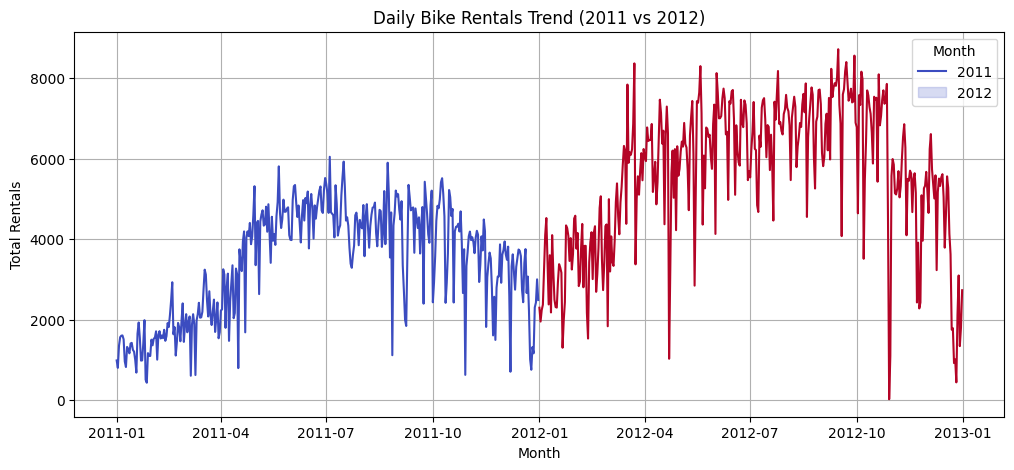

In [31]:
day_df["year"] = day_df["dteday"].dt.year

# 1️⃣ Visualisasi Tren Penyewaan Sepeda Harian dari 2011 ke 2012
plt.figure(figsize=(12, 5))
sns.lineplot(data=day_df, x="dteday", y="cnt", hue="year", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.title("Daily Bike Rentals Trend (2011 vs 2012)")
plt.legend(title="Month", labels=["2011", "2012"])
plt.grid(True)
plt.show()

Tren Penyewaan Sepeda Harian dari 2011 ke 2012 :
- Analisis ini bertujuan untuk melihat bagaimana jumlah penyewaan sepeda berubah dari hari ke hari selama periode 2011-2012. Dengan memplot data harian, kita dapat mengidentifikasi pola musiman, tren pertumbuhan, dan fluktuasi dalam jumlah penyewaan sepeda.

**Insight :**
- Jumlah penyewaan sepeda meningkat dari 2011 ke 2012, terlihat dari perbedaan level antara kedua tahun.
- Terdapat pola musiman yang jelas, dengan puncak penyewaan terjadi pada musim gugur (bulan 7-10) dan penurunan di musim dingin (bulan 12-3).
- Fluktuasi penyewaan lebih stabil di 2012 dibandingkan 2011, menunjukkan kemungkinan adanya peningkatan jumlah pengguna tetap.

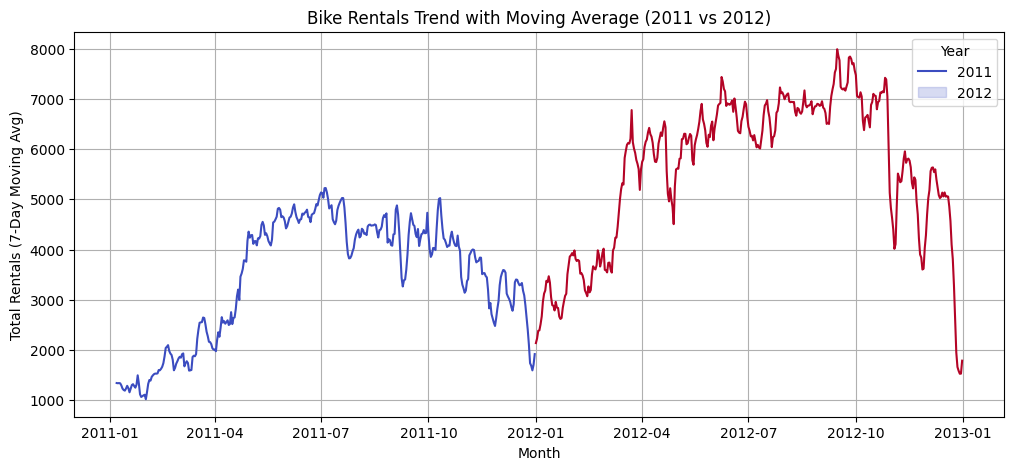

In [30]:
# 2️⃣ Menghitung Moving Average (7 hari) untuk melihat tren yang lebih halus
day_df["cnt_ma7"] = day_df["cnt"].rolling(window=7).mean()

# Visualisasi Moving Average
plt.figure(figsize=(12, 5))
sns.lineplot(data=day_df, x="dteday", y="cnt_ma7", hue="year", palette="coolwarm")
plt.xlabel("Month")
plt.ylabel("Total Rentals (7-Day Moving Avg)")
plt.title("Bike Rentals Trend with Moving Average (2011 vs 2012)")
plt.legend(title="Year", labels=["2011", "2012"])
plt.grid(True)
plt.show()

Moving Average (7-Day Smoothing) untuk Melihat Tren Lebih Jelas :
- Moving average (rata-rata bergerak) digunakan untuk menghaluskan fluktuasi harian dan menyoroti tren jangka panjang dalam penyewaan sepeda.

**Insight :**
- Moving average menunjukkan tren naik secara bertahap sepanjang tahun, dengan lonjakan yang signifikan selama musim panas.
- Penurunan tajam di akhir tahun (bulan 12-2), yang menunjukkan bahwa musim dingin sangat berdampak pada jumlah penyewaan.
- Pola berulang dari minggu ke minggu, yang menunjukkan bahwa penyewaan sepeda memiliki komponen musiman yang kuat.

## **Conclusion**

**Kesimpulan pertanyaan 1 :**
"Bagaimana pola penggunaan sepeda oleh pengguna berulang (pengguna lama) dibandingkan dengan pengguna baru dalam rentang waktu mingguan, bulanan, dan musiman?"

- Dalam skala mingguan, pengguna casual lebih aktif di akhir pekan, sedangkan pengguna registered lebih aktif di hari kerja.
- Dalam skala bulanan, penyewaan meningkat selama musim panas dan menurun di musim dingin, dengan pengguna casual mengalami fluktuasi lebih besar dibandingkan registered.
- Dalam skala musiman, pengguna casual lebih sensitif terhadap cuaca, dengan penyewaan tertinggi di musim panas dan hampir tidak ada aktivitas di musim dingin, sementara pengguna registered tetap lebih stabil sepanjang tahun.
- Dalam hal durasi perjalanan, pengguna casual lebih sering melakukan perjalanan pendek (<30 menit), sementara pengguna registered lebih cenderung menggunakan sepeda untuk perjalanan menengah hingga panjang (>30 menit).
- Frekuensi penggunaan menunjukkan bahwa pengguna registered lebih sering menggunakan sepeda secara konsisten sepanjang tahun, sedangkan pengguna casual lebih musiman dan rekreasional.

**Kesimpulan pertanyaan 2 :** "Apakah tren jumlah penyewaan sepeda meningkat dari tahun 2011 ke 2012, dan faktor apa yang paling mempengaruhinya?"

- Jumlah penyewaan sepeda meningkat dari 2011 ke 2012, menandakan pertumbuhan layanan bike-sharing.
- Suhu adalah faktor utama yang mempengaruhi penyewaan sepeda, dengan cuaca ekstrem (kelembaban tinggi & angin kencang) mengurangi jumlah penyewaan.
- Sebagian besar pengguna menggunakan sepeda untuk perjalanan panjang (>60 menit), yang menunjukkan bahwa layanan ini digunakan lebih banyak untuk commuting daripada rekreasi.
- Fluktuasi mingguan menunjukkan bahwa sepeda digunakan baik untuk transportasi harian maupun rekreasi, dengan lonjakan di akhir pekan.
